# Task 1 - The "Sharp-Shot" Video Filter

### As we know sharp images means image that contains sharp edges

Edges are the regions where intensity changes

Calculating the first derivative shows the rate of change of intensity so in blurred images these changes are spread over a wider area, resulting in weaker and less localized edge responses

Calculating second derivative shows the rate of change of the rate of change and this means that for sharp edges (sudden intensity changes) there will be large values.

Second derivative can be calculated with Laplacian function

Then we can calculate variance of the output for all images to check which images had the highest variance meaning the highest sudden jumps in intensity (sharpest edges) and highest spread of values and those will be considered the sharpest images

In [2]:
!wget -O dataset.zip "http://www.cs.ubc.ca/labs/imager/tr/2017/DeepVideoDeblurring/DeepVideoDeblurring_Dataset_Original_High_FPS_Videos.zip"

--2026-01-17 00:09:02--  http://www.cs.ubc.ca/labs/imager/tr/2017/DeepVideoDeblurring/DeepVideoDeblurring_Dataset_Original_High_FPS_Videos.zip
Resolving www.cs.ubc.ca (www.cs.ubc.ca)... 142.103.6.5
Connecting to www.cs.ubc.ca (www.cs.ubc.ca)|142.103.6.5|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.cs.ubc.ca/labs/imager/tr/2017/DeepVideoDeblurring/DeepVideoDeblurring_Dataset_Original_High_FPS_Videos.zip [following]
--2026-01-17 00:09:02--  https://www.cs.ubc.ca/labs/imager/tr/2017/DeepVideoDeblurring/DeepVideoDeblurring_Dataset_Original_High_FPS_Videos.zip
Connecting to www.cs.ubc.ca (www.cs.ubc.ca)|142.103.6.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2995547015 (2.8G) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]   2.79G  23.3MB/s    in 3m 40s  

2026-01-17 00:12:42 (13.0 MB/s) - ‘dataset.zip’ saved [2995547015/2995547015]



In [11]:
import zipfile
import os
import cv2
import heapq
import matplotlib.pyplot as plt

In [3]:
zip_path = "/content/dataset.zip"
extract_to = "/content/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


In [17]:
# blurry video from the dataset
video_path1 = "/content/original_high_fps_videos/GOPR9637a.mp4"
# Video taken by me
video_path2 = "/content/my_vid.mp4"

In [18]:
# Now lets create the function for our laplacian and variance
# Images must be converted to grayscale first since lalpacian operates on intensity changes not colors

def laplacian_var(frame):
  grayscale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  laplacian = cv2.Laplacian(grayscale, cv2.CV_64F)
  return laplacian.var()


In [19]:
  os.makedirs("outputframes", exist_ok=True)

In [ ]:
def process_video(video_path):
  # Getting the frames
  cap = cv2.VideoCapture(video_path)
  frame_scores = []
  frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  fps = cap.get(cv2.CAP_PROP_FPS)

  while True:
      ret, frame = cap.read()
      if not ret:
          break
      frame_idx = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
      score = laplacian_var(frame)
      frame_scores.append((score, frame_idx, frame))

  cap.release()
  # Sorting frames desc to get the largest frames
  frame_scores.sort(reverse=True, key=lambda x: x[0])
  selected_frames = []
  seconds_selected = set()

  # To check frames are not in same second we will add the second of a frame that we already chose in a set and check for each frame that the second is not taken before
  for score, idx, frame in frame_scores:
    second = int(idx / fps)
    if second not in seconds_selected:
        selected_frames.append((score, idx, frame))
        seconds_selected.add(second)
    if len(selected_frames) == 5:
        break

  plt.figure(figsize=(30, 10))

  for i, (score, idx, frame) in enumerate(selected_frames):
      out_path = os.path.join("outputframes", f"frame_{i+1}_idx{idx}_score{int(score)}.jpg")
      cv2.imwrite(out_path, frame)
      print(f"Saved {out_path} with sharpness {score:.2f}")


      frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

      plt.subplot(len(selected_frames),1, i + 1)
      plt.imshow(frame_rgb)
      plt.title(f"Frame {idx}\nSharpness={score:.1f}")
      plt.axis("off")

  plt.tight_layout()
  plt.show()





Saved outputframes/frame_1_idx1002_score406.jpg with sharpness 406.25
Saved outputframes/frame_2_idx1036_score403.jpg with sharpness 403.48
Saved outputframes/frame_3_idx1091_score362.jpg with sharpness 362.65
Saved outputframes/frame_4_idx123_score358.jpg with sharpness 358.87
Saved outputframes/frame_5_idx1090_score354.jpg with sharpness 354.94


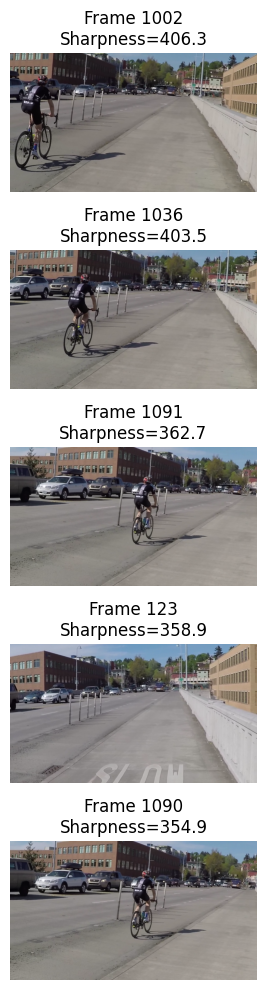

In [23]:
# video from the dataset
process_video(video_path1)

Saved outputframes/frame_1_idx298_score63.jpg with sharpness 63.02
Saved outputframes/frame_2_idx93_score33.jpg with sharpness 33.69
Saved outputframes/frame_3_idx238_score33.jpg with sharpness 33.29
Saved outputframes/frame_4_idx61_score28.jpg with sharpness 28.59
Saved outputframes/frame_5_idx141_score24.jpg with sharpness 24.69


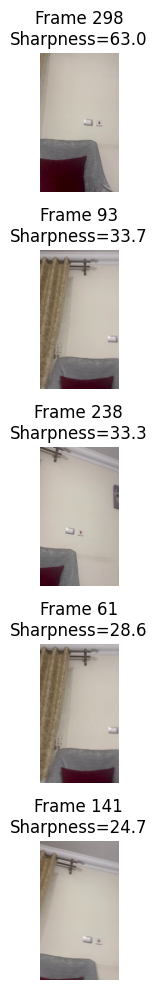

In [24]:
# video recorded by me
process_video(video_path2)